
<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Soal Praktikum Convolutional Neural Network**

Pada tugas praktikum modul 2 CNN kali ini anda diminta untuk membuat model dengan kombinasi layer Convolutional, Pooling, dan Fully Connected Layer

Praktikum kali ini anda diminta menggunakan dataset breast cancer yang bisa diunduh menggunakan kaggle API dari: https://www.kaggle.com/forderation/breakhis-400x


Dataset tersebut merupakan gambar mikroskopis dengan zoom sebesar 400x pada pasien yang mengalami kanker payudara (Breast Cancer), dimana pada dataset tesebut dibagi menjadi dua kelas yaitu Tumor ganas (Malignant) dan Tumor jinak (Benign). Dataset sudah dibagi menjadi folder training dan testing yang berbeda dengan struktur sebagai berikut:
- BreaKHis 400X/train/benign/*kumpulan gambar
- BreaKHis 400X/train/malignant/*kumpulan gambar
- BreaKHis 400X/test/benign/*kumpulan gambar
- BreaKHis 400X/test/malignant/*kumpulan gambar

Anda diminta membuat 2 scenario modelling dengan kriteria sebagai berikut:
- 1. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **maxpooling** kemudian diakhir layer CNN tambahkan **globalmaxpooling** sebelum melakukan flatten (model1)
- 2. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **averagepooling** kemudian diakhir layer CNN tambahkan **globalaveragepooling** sebelum melakukan flatten (model2)



---



# 1. Load Data (total 15 point)

Task yang perlu dikerjakan:
1. Unduh dataset tersebut kemudian lakukan ektraksi zip (point 5)
2. Menampilkan hasil jumlah pembagian (point 5)
3. Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom (point 5)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/modul2

/content/drive/My Drive/Colab Notebooks/modul2


In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/content/drive/My Drive/Colab Notebooks/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/Colab Notebooks/modul2')
zip_ref.close()

In [ ]:
# hasil pengerjaan point 1.2
import os

dir = ["/content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/train/benign","/content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/train/malignant", "/content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/test/benign", "/content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/test/malignant"]
for i in dir:
  list = os.listdir(i) # dir is your directory path
  number_files = len(list)
  print ("Total "+i+": "+str(number_files))

Total /content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/train/benign: 371
Total /content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/train/malignant: 777
Total /content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/test/benign: 176
Total /content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/test/malignant: 369


In [ ]:
# hasil pengerjaan point 1.3

In [ ]:
# import cv2 
# import os 
# import glob 

# path1 = '/tmp/BreaKHis 400X/test/benign'
# path2 = '/tmp/BreaKHis 400X/test/malignant'

# path = "/tmp/BreaKHis 400X/test/benign"
# folders = glob.glob(path+"*.png")
# folders

# 2. Preprocessing (total 15 point)

Task yang perlu dikerjakan:
1. Gather data training dan testing dengan ukuran gambar **250x250** (total 5 point)
2. Normalisasi dataset (total 5 point)
3. Membuat label encoder (total 5 point)


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk('/content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/train'):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk('/content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/test'):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
Validation Data =  (545, 250, 250, 3)
Validation Label =  (545,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [192 190 189]
Data setelah di-normalisasi  [0.7529412  0.74509805 0.7411765 ]


In [ ]:
# hasil pengerjaan point 2.3

In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


# 3. Modelling (total 30 point)

Task yang perlu dikerjakan:
1. Membuat & menampilkan scenario Pertama (total 10 point)
2. Membuat & menampilkan summary model scenario Kedua (total 10 point)
3. Training model scenario Pertama (total 5 point)
4. Training model scenario Kedua (total 5 point)

Anda diminta membuat 2 scenario modelling dengan kriteria sebagai berikut:
- 1. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **maxpooling** kemudian diakhir layer CNN tambahkan **globalmaxpooling** sebelum melakukan flatten (model1)
- 2. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **averagepooling** kemudian diakhir layer CNN tambahkan **globalaveragepooling** sebelum melakukan flatten (model2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D

In [ ]:
# Model Scenario Pertama
# Feature Extraction Layer
model_m = Sequential()

model_m.add(InputLayer(input_shape=[250,250,3]))
model_m.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model_m.add(MaxPool2D(pool_size=2, padding='same'))
model_m.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model_m.add(MaxPool2D(pool_size=2, padding='same'))
model_m.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_m.add(GlobalMaxPooling2D())
model_m.add(Flatten())

In [ ]:
# Fully Connected Layer
model_m.add(Dense(128, activation='relu'))
model_m.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model_m.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model_m.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
# Model Scenario Kedua
# Feature Extraction Layer
model_a = Sequential()

model_a.add(InputLayer(input_shape=[250,250,3]))
model_a.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model_a.add(AveragePooling2D(pool_size=2, padding='same'))
model_a.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model_a.add(AveragePooling2D(pool_size=2, padding='same'))
model_a.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_a.add(GlobalAveragePooling2D())
model_a.add(Flatten())

In [ ]:
# Fully Connected Layer
model_a.add(Dense(128, activation='relu'))
model_a.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model_a.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model_a.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Training model scenario Pertama
H1 = model_m.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))
model_m.save("model1.h5")

Epoch 1/15
58/58 [==============================] - 3s 46ms/step - loss: 0.5873 - acc: 0.6838 - val_loss: 0.5663 - val_acc: 0.6771
Epoch 2/15
58/58 [==============================] - 2s 39ms/step - loss: 0.4863 - acc: 0.7909 - val_loss: 0.4670 - val_acc: 0.8422
Epoch 3/15
58/58 [==============================] - 2s 39ms/step - loss: 0.4455 - acc: 0.8110 - val_loss: 0.5581 - val_acc: 0.7009
Epoch 4/15
58/58 [==============================] - 2s 39ms/step - loss: 0.4189 - acc: 0.8345 - val_loss: 0.4761 - val_acc: 0.7817
Epoch 5/15
58/58 [==============================] - 2s 39ms/step - loss: 0.4181 - acc: 0.8380 - val_loss: 0.4005 - val_acc: 0.8477
Epoch 6/15
58/58 [==============================] - 2s 39ms/step - loss: 0.3526 - acc: 0.8789 - val_loss: 0.3949 - val_acc: 0.8587
Epoch 7/15
58/58 [==============================] - 2s 39ms/step - loss: 0.3381 - acc: 0.8859 - val_loss: 0.3760 - val_acc: 0.8569
Epoch 8/15
58/58 [==============================] - 2s 40ms/step - loss: 0.3783 - a

In [ ]:
# Training model scenario Pertama
H2 = model_a.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))
model_a.save("model2.h5")

Epoch 1/15
58/58 [==============================] - 2s 39ms/step - loss: 0.5953 - acc: 0.6733 - val_loss: 0.5409 - val_acc: 0.6789
Epoch 2/15
58/58 [==============================] - 2s 38ms/step - loss: 0.4989 - acc: 0.7848 - val_loss: 0.4881 - val_acc: 0.8128
Epoch 3/15
58/58 [==============================] - 2s 39ms/step - loss: 0.4438 - acc: 0.8214 - val_loss: 0.4425 - val_acc: 0.8440
Epoch 4/15
58/58 [==============================] - 2s 38ms/step - loss: 0.4218 - acc: 0.8371 - val_loss: 0.4516 - val_acc: 0.8385
Epoch 5/15
58/58 [==============================] - 2s 38ms/step - loss: 0.4434 - acc: 0.8084 - val_loss: 0.4944 - val_acc: 0.7780
Epoch 6/15
58/58 [==============================] - 2s 38ms/step - loss: 0.4073 - acc: 0.8336 - val_loss: 0.5135 - val_acc: 0.7578
Epoch 7/15
58/58 [==============================] - 2s 38ms/step - loss: 0.4191 - acc: 0.8371 - val_loss: 0.4306 - val_acc: 0.8367
Epoch 8/15
58/58 [==============================] - 2s 38ms/step - loss: 0.4345 - a

# 4. Result (total 25 point)

Task yang perlu dikerjakan:
1. Plot hasil akurasi dan loss dari kedua model menjadi 1 canvas (10 point)
2. Melakukan uji coba dari salah satu gambar test pada model 1 dan model 2 (10 point)
3. Klasifikasi report dari kedua model (5 point)
4. Jika hasil akurasi model CNN klasifikasi report kedua model diatas 90% (15 point)

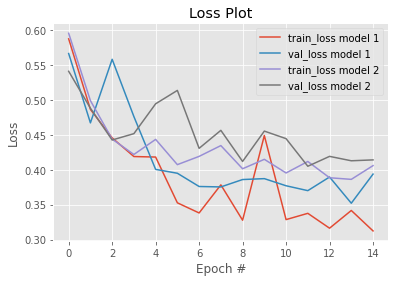

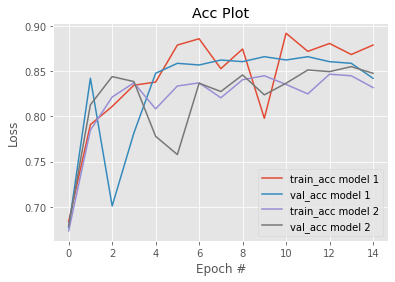

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H1.history["loss"], label="train_loss model 1")
plt.plot(np.arange(0, 15), H1.history["val_loss"], label="val_loss model 1")
plt.plot(np.arange(0, 15), H2.history["loss"], label="train_loss model 2")
plt.plot(np.arange(0, 15), H2.history["val_loss"], label="val_loss model 2")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H1.history["acc"], label="train_acc model 1")
plt.plot(np.arange(0, 15), H1.history["val_acc"], label="val_acc model 1")
plt.plot(np.arange(0, 15), H2.history["acc"], label="train_acc model 2")
plt.plot(np.arange(0, 15), H2.history["val_acc"], label="val_acc model 2")
plt.title("Acc Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Hasil pengerjaan point 4.2

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Hasil prediksi model 1 : malignant
Hasil prediksi model 2 : malignant


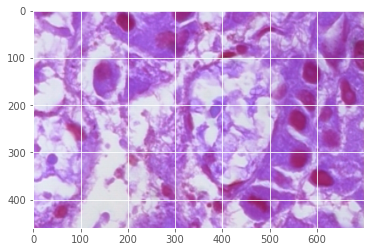

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

model1 = load_model('model1.h5')

# model1.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

model2 = load_model('model2.h5')

# model2.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

gambar = cv2.imread('/content/drive/My Drive/Colab Notebooks/modul2/BreaKHis 400X/test/malignant/SOB_M_DC-14-10926-400-004.png')

img = gambar
img = cv2.resize(img,(250,250))
img = np.reshape(img,[1,250,250,3])

classes1 = model1.predict_classes(img)
classes2 = model1.predict_classes(img)

if classes1[0][0] == 1:
    prediction1 = 'malignant'
else:
    prediction1 = 'benign'

if classes2[0][0] == 1:
    prediction2 = 'malignant'
else:
    prediction2 = 'benign'

print('Hasil prediksi model 1 : '+prediction1)
print('Hasil prediksi model 2 : '+prediction2)
plt.imshow(gambar)

In [ ]:
# Hasil pengerjaan point 4.3
from sklearn.metrics import classification_report

print('model 1')
pred = model_m.predict(x_val)
labels = (pred > 0.5).astype(np.int)
print(classification_report(y_val, labels))

print('model 2')
pred = model_a.predict(x_val)
labels = (pred > 0.5).astype(np.int)
print(classification_report(y_val, labels))

model 1
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       176
           1       0.83      0.97      0.89       369

    accuracy                           0.84       545
   macro avg       0.86      0.77      0.80       545
weighted avg       0.85      0.84      0.83       545

model 2
              precision    recall  f1-score   support

           0       0.88      0.61      0.72       176
           1       0.84      0.96      0.90       369

    accuracy                           0.85       545
   macro avg       0.86      0.79      0.81       545
weighted avg       0.85      0.85      0.84       545

